# Mel spectrogram time stretching exploration


Import the necessary libraries


In [139]:

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import IPython.display as ipd

Set constant file paths


In [140]:
root_dir = '../data/'
test_set = 'test_dataset.csv'

Define the function to repetively pad the audio


In [141]:
def time_stetch_audio(y, target_duration, sr):
    current_duration = len(y) / sr

    # Calculate the stretch rate to match the target duration
    stretch_rate = current_duration / target_duration
    y = librosa.effects.time_stretch(y, rate=stretch_rate)

    # Trim or pad to ensure exact length after stretching
    target_length = int(target_duration * sr)

    if len(y) > target_length:
        y = y[:target_length]
    elif len(y) < target_length:
        y = np.pad(y, (0, target_length - len(y)), mode='constant')

    return y

Select a random speech sample form the test dataset


In [142]:
df = pd.read_csv(os.path.join(root_dir, test_set))

# Check first few rows to confirm data is loaded correctly
print(df.head())

selected_row = df.sample(n=1)

random_filepath = os.path.join(
    root_dir, selected_row['Filepath'].iloc[0].replace('\\', '/'))

print(f'Random filepath: {random_filepath}')

   Id    Dataset                                           Filepath  \
0   0      MLEND          ./dataset/mlend\MLEndSND_Public\01620.wav   
1   1  JL-CORPUS  ./dataset/jl-corpus/Raw JL corpus (unchecked a...   
2   2      MLEND          ./dataset/mlend\MLEndSND_Public\04997.wav   
3   3        ESD        ./dataset/esd\0018\Surprise\0018_001454.wav   
4   4      MLEND          ./dataset/mlend\MLEndSND_Public\05521.wav   

             Filename   Ext  Duration   Emotion  
0           01620.wav  .wav  1.578957   Neutral  
1  male1_sad_5a_1.wav  .wav  2.350000       Sad  
2           04997.wav  .wav  1.172608  Question  
3     0018_001454.wav  .wav  2.836000  Surprise  
4           05521.wav  .wav  1.462857   Neutral  
Random filepath: ../data/./dataset/esd/0019/Angry/0019_000677.wav


Load the randomly-selected speech sample


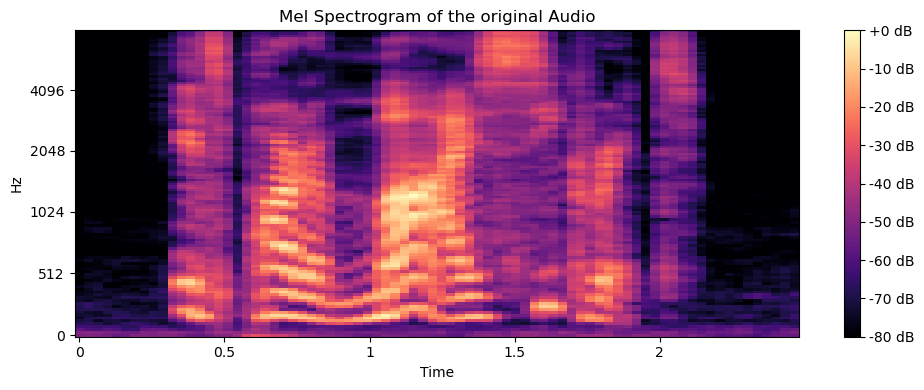

In [143]:
# Load your audio clip at a target sample rate (e.g., 16000 Hz)
y, sr = librosa.load(random_filepath, sr=16000)

display(ipd.Audio(y, rate=sr))

melspectrogram = librosa.feature.melspectrogram(
    y=y,
    sr=sr,
    n_fft=2048,
    hop_length=512,
    n_mels=128
)
melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)

# Plot and display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrogram_db, sr=sr,
                         hop_length=512, x_axis='time', y_axis='mel')
plt.title(f'Mel Spectrogram of the original Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

Repetitively pad the randomly-selected speech sample


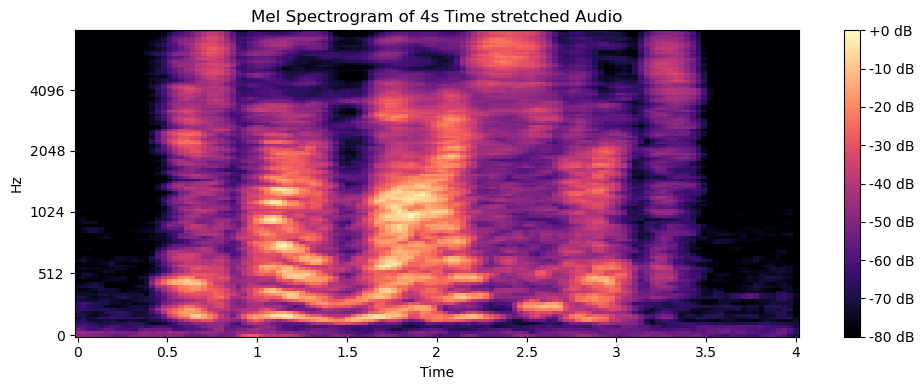

In [144]:
# Calculate the desired total number of samples for 11 seconds
target_duration = 4  # seconds
target_length = int(target_duration * sr)

# Apply time stretching
y_stretched = time_stetch_audio(y, target_duration, sr)

# Extract the mel spectrogram from the time-stretched audio
melspectrogram = librosa.feature.melspectrogram(
    y=y_stretched,
    sr=sr,
    n_fft=2048,
    hop_length=512,
    n_mels=128
)
melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)

# Plot and display the mel spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspectrogram_db, sr=sr,
                         hop_length=512, x_axis='time', y_axis='mel')
plt.title(f'Mel Spectrogram of {target_duration}s Time stretched Audio')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Create an audio player widget to play the time-stretched audio
display(ipd.Audio(y_stretched, rate=sr))